In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.data


In [2]:
data= pd.read_csv("/kaggle/input/iris-dataset/iris.data")
data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
print(data.columns)
data.head()

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df=data.rename(columns={"5.1":"Sepal Length(cm)","3.5":"Sepal Width(cm)","1.4":"Petal Length(cm)","0.2":"Petal Width(cm)","Iris-setosa":"Type"})

In [5]:
df.head()

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [7]:
model= DecisionTreeClassifier()

In [8]:
y=df.pop("Type")
X=df


In [9]:
print(y.head())
print(X.head())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Type, dtype: object
   Sepal Length(cm)  Sepal Width(cm)  Petal Length(cm)  Petal Width(cm)
0               4.9              3.0               1.4              0.2
1               4.7              3.2               1.3              0.2
2               4.6              3.1               1.5              0.2
3               5.0              3.6               1.4              0.2
4               5.4              3.9               1.7              0.4


In [10]:
model.fit(X,y)

DecisionTreeClassifier()

In [11]:
y_pred = model.predict(X)
print(accuracy_score(y, y_pred))

1.0


In [12]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)
# you can save it to the text file
#with open("decistion_tree.txt", "w") as fout:fout.write(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



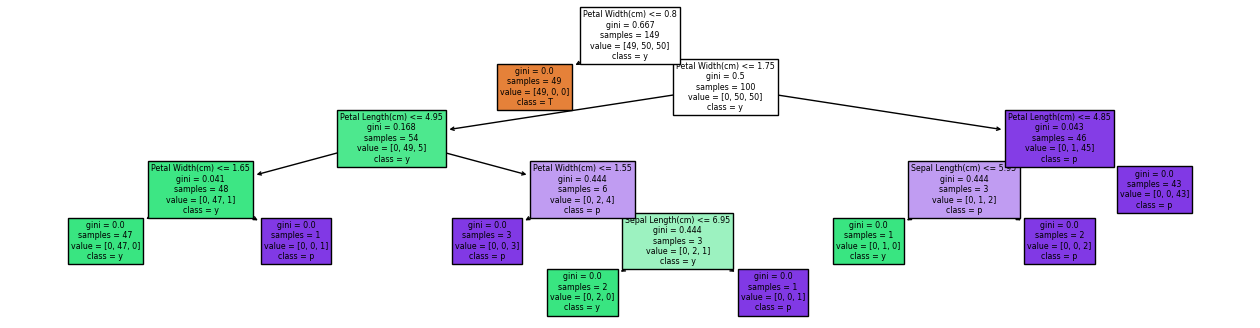

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
p = tree.plot_tree(model,
feature_names=X.columns, # inputs is pandas.core.frame.DataFrame
class_names=y.name, # labels is pandas.core.series.Series
filled=True)
plt.show()


In [14]:
new_input=[[3,4,5,4]]
predictions = model.predict(new_input)
print ('Input', new_input,'and Prediction', predictions)

Input [[3, 4, 5, 4]] and Prediction ['Iris-virginica']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
